## T3: Taller contrastes de números aleatorios

Diego Fernando Palacios Hoyos

Codigo: 160003727


## Aplicar las pruebas de uniformidad de Kolmogorov-Smirnov

¿Cuantos numeros aleatorios? 50
Pruebas de Kolmogorov-Smirnov
Semilla Xo=997
Generador randu


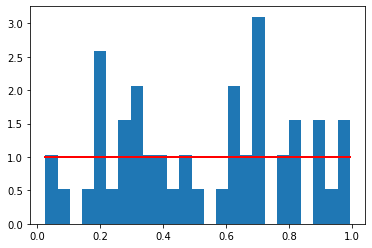

De =  0.23394072205739014


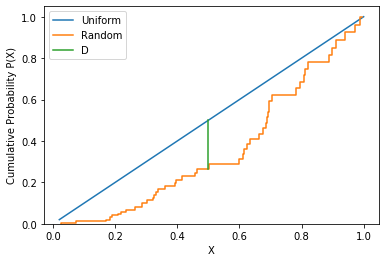

D =  0.23394072205739003
p-value =  0.006864071730228503 

Generador gSinclair


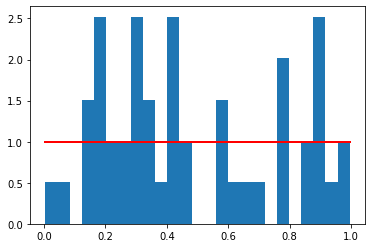

De =  0.25435397011528255


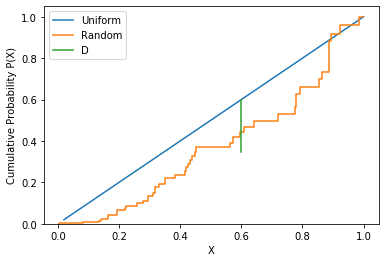

D =  0.2543539701152823
p-value =  0.0024403440898593956 

Generador numericalReciepies


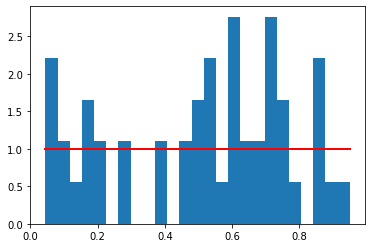

De =  0.21432969176264657


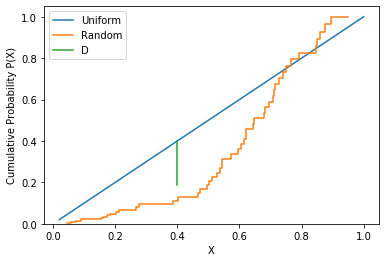

D =  0.21432969176264652
p-value =  0.01703772640308219 

Generador Borland


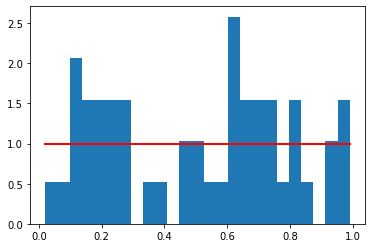

De =  0.25021113647620563


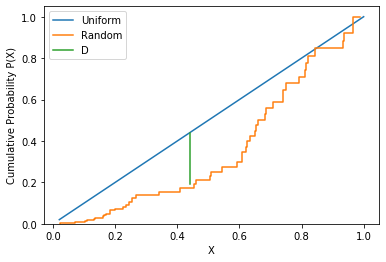

D =  0.2502111364762055
p-value =  0.003032318027211492 



In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def RANDU(N):
    x = 997
    a = 65539
    m = 2 ** 31
    i=1
    final=[]

    while i<=int(N): 
        xn=int(a)*int(x)
        xi=xn%int(m)
        ui=xi/int(m)
        #print(ui)
        i=i+1
        x=xi
        final.append(ui)
    
    return final

def Sinclair(N):
    x = 997
    a = 75
    m = (2 ** 16)+1
    i=1
    final=[]

    while i<=int(N): 
        xn=int(a)*int(x)
        xi=xn%int(m)
        ui=xi/int(m)
        #print(ui)
        i=i+1
        x=xi
        final.append(ui)
    
    return final

def NumericalReciepes(N):
    x = 997
    a = 1664525
    c = 1013904223
    m = 2 ** 32
    i=1
    final=[]

    while i<=int(N): 
        xn=int(a)*int(x)
        xi=(xn+int(c))%int(m)
        ui=xi/int(m)
        #print(ui)
        i=i+1
        x=xi
        final.append(ui)
    
    return final
    

def Borland(N):
    x = 997
    a = 22695477
    c = 1
    m = 2 ** 32
    i=1
    final=[]

    while i<=int(N): 
        xn=int(a)*int(x)
        xi=(xn+int(c))%int(m)
        ui=xi/int(m)
        #print(ui)
        i=i+1
        x=xi
        final.append(ui)
    
    return final

def Kolmog(n,x):
    
    
    count, bins, ignored = plt.hist(x, 25, density=True)
    plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
    plt.show()


    x1 = np.arange(1/N,1+1/N,1/N)
    y1 = np.cumsum(np.sort(u)/np.max(np.cumsum(u)))

    x2 = np.sort(x)
    y2 = np.cumsum(np.sort(x)/np.max(np.cumsum(x)))
    
    De=np.absolute(y2-y1)
    print("De = ",np.max(De))

    plt.plot(x1,y1,label='Uniform')
    plt.step(x2,y2,label='Random')
    x3 = [x1[De.argmax()],x1[De.argmax()]]
    y3 = [np.min([y1[De.argmax()],y2[De.argmax()]]),np.max([y1[De.argmax()],y2[De.argmax()]])]
    plt.step(x3,y3,label='D')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Cumulative Probability P(X)')
    plt.ylim(0, 1.05)
    plt.show()
    from scipy import stats
    D,pvalue = stats.kstest(y2, 'uniform')
    print("D = ", D)
    print("p-value = ", pvalue,"\n")
    
N=int(input("¿Cuantos numeros aleatorios? "));
u = [1.0] * N;
print("Pruebas de Kolmogorov-Smirnov")
print("Semilla Xo=997")

print("Generador randu")
X = RANDU(N)
Kolmog(N,X)

print("Generador gSinclair")
s = Sinclair(N)
Kolmog(N,s)

print("Generador numericalReciepies")
re = NumericalReciepes(N)
Kolmog(N,re)

print("Generador Borland")
b=Borland(N)
Kolmog(N,b)



## Aplicar las pruebas de uniformidad de Chi2 

In [4]:
import numpy as np
import scipy as sp
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy import stats

def RANDU(N):
    x = 997
    a = 65539
    m = 2 ** 31
    i=1
    final=[]

    while i<=int(N): 
        xn=int(a)*int(x)
        xi=xn%int(m)
        ui=xi/int(m)
        #print(ui)
        i=i+1
        x=xi
        final.append(ui)
    
    return final

def Sinclair(N):
    x = 997
    a = 75
    m = (2 ** 16)+1
    i=1
    final=[]

    while i<=int(N): 
        xn=int(a)*int(x)
        xi=xn%int(m)
        ui=xi/int(m)
        #print(ui)
        i=i+1
        x=xi
        final.append(ui)
    
    return final

def NumericalReciepes(N):
    x = 997
    a = 1664525
    c = 1013904223
    m = 2 ** 32
    i=1
    final=[]

    while i<=int(N): 
        xn=int(a)*int(x)
        xi=(xn+int(c))%int(m)
        ui=xi/int(m)
        #print(ui)
        i=i+1
        x=xi
        final.append(ui)
    
    return final

def Borland(N):
    x = 997
    a = 22695477
    c = 1
    m = 2 ** 32
    i=1
    final=[]

    while i<=int(N): 
        xn=int(a)*int(x)
        xi=(xn+int(c))%int(m)
        ui=xi/int(m)
        #print(ui)
        i=i+1
        x=xi
        final.append(ui)
    
    return final

def chiCuadrado(critico,canpart,secuencia=[]):
    
    longitudIntervalo = 1 / float(canpart) 
    frecuenciasObservadas = []           


    for i in range(0,canpart):
        frecuenciasObservadas.append(0)
        
    

   
    
    for i in range(len(secuencia)):
        cont = 1
        for j in range(0,canpart):     
            if secuencia[i] > (cont - 1) * longitudIntervalo and secuencia[i] <= cont * longitudIntervalo:
                frecuenciasObservadas[j] += 1
            cont += 1 
            
    
        
    frecuenciaEsperada = len(secuencia) / float(canpart)
    chiCuadrado = 0.0
        
    for i in range(0,canpart):
        chiCuadrado += (frecuenciasObservadas[i] - frecuenciaEsperada)**2 / frecuenciaEsperada
    
    chiCuadrado=round(chiCuadrado,4);
    print ("Prueba del simulador=",chiCuadrado)
    


    if(chiCuadrado<critico):
        print("Aceptada la hipotesis de uniformidad chi-cuadrado\n")
    
    else:
        print("Rechazada la hipotesis de uniformidad chi-cuadrado\n")


N=int(input("¿Cuantos numeros aleatorios? "));
print("Valor de Xo=997")
k = int(input("Introduzca el valor de k: ")) 
crit = stats.chi2.ppf(q = 0.95,df = k)
crit=round(crit,4)
print("Prueba chi-cuadrado con k=",k," y 95% = ",crit)

print("Generador randu")
X = RANDU(N)
chiCuadrado(crit,k,X)

print("Generador Sinclair")
s = Sinclair(N)
chiCuadrado(crit,k,s)

print("Generador numericalReciepies")
re = NumericalReciepes(N)
chiCuadrado(crit,k,re)

print("Generador Borland")
b=Borland(N)
chiCuadrado(crit,k,b)



¿Cuantos numeros aleatorios? 50
Valor de Xo=997
Introduzca el valor de k: 10
Prueba chi-cuadrado con k= 10  y 95% =  18.307
Generador randu
Prueba del simulador= 13.6
Aceptada la hipotesis de uniformidad chi-cuadrado

Generador Sinclair
Prueba del simulador= 9.6
Aceptada la hipotesis de uniformidad chi-cuadrado

Generador numericalReciepies
Prueba del simulador= 14.0
Aceptada la hipotesis de uniformidad chi-cuadrado

Generador Borland
Prueba del simulador= 15.2
Aceptada la hipotesis de uniformidad chi-cuadrado



## Prueba de aleatoriedad de rachas para evaluar los siguientes generadores pseudoaleatorios

In [6]:
import numpy as np
import scipy as sp
import math
import scipy.stats as stats

def RANDU(N):
    x = 997
    a = 65539
    m = 2 ** 31
    i=1
    final=[]

    while i<=int(N): 
        xn=int(a)*int(x)
        xi=xn%int(m)
        ui=xi/int(m)
        #print(ui)
        i=i+1
        x=xi
        final.append(ui)
    
    return final

def Sinclair(N):
    x = 997
    a = 75
    m = (2 ** 16)+1
    i=1
    final=[]

    while i<=int(N): 
        xn=int(a)*int(x)
        xi=xn%int(m)
        ui=xi/int(m)
        #print(ui)
        i=i+1
        x=xi
        final.append(ui)
    
    return final

def NumericalReciepes(N):
    x = 997
    a = 1664525
    c = 1013904223
    m = 2 ** 32
    i=1
    final=[]

    while i<=int(N): 
        xn=int(a)*int(x)
        xi=(xn+int(c))%int(m)
        ui=xi/int(m)
        #print(ui)
        i=i+1
        x=xi
        final.append(ui)
    
    return final

def Borland(N):
    x = 997
    a = 22695477
    c = 1
    m = 2 ** 32
    i=1
    final=[]

    while i<=int(N): 
        xn=int(a)*int(x)
        xi=(xn+int(c))%int(m)
        ui=xi/int(m)
        #print(ui)
        i=i+1
        x=xi
        final.append(ui)
    
    return final

def testRachas(x):
    tRacha=[]
    for i in range(len(x)-1):
        if x[i] > x[i+1]:
            tRacha.append(0)
        elif x[i] < x[i+1]:
            tRacha.append(1)
    R=1 
    for i in range(len(tRacha)-1):
        if tRacha[i]!=tRacha[i+1]: 
            R+=1
    print ("Las rachas son: ")
    print (R)
    
    Z = (R - (2*N-1)/float(3))/math.sqrt((16*N-29)/float(90))
    
    #print("Z=",Z)
    print ("|Z|= ")
    print (np.absolute(Z),"\n")
    z=np.absolute(Z)
    if(z<1.960):
        print("Aceptada la prueba de rachas\n")
    else:
        print("Rechazada la prueba de rachas\n")
        
N=int(input("¿Cuantos numeros ?"));
print("Test de rachas con xo=997")
    
print("Generador randu")
X = RANDU(N)
testRachas(X)

print("Generador Sinclair")
s = Sinclair(N)
testRachas(s)

print("Generador numericalReciepies")
re = NumericalReciepes(N)
testRachas(re)

print("Generador Borland")
b=Borland(N)
testRachas(b)


¿Cuantos numeros ?50
Test de rachas con xo=997
Generador randu
Las rachas son: 
34
|Z|= 
0.34165994425704577 

Aceptada la prueba de rachas

Generador Sinclair
Las rachas son: 
31
|Z|= 
0.6833198885140915 

Aceptada la prueba de rachas

Generador numericalReciepies
Las rachas son: 
29
|Z|= 
1.366639777028183 

Aceptada la prueba de rachas

Generador Borland
Las rachas son: 
31
|Z|= 
0.6833198885140915 

Aceptada la prueba de rachas

